In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('BrainTumor.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(2000, 11)

In [4]:
df.head()

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   2000 non-null   int64  
 1   Age                          2000 non-null   int64  
 2   Gender                       2000 non-null   object 
 3   Tumor Type                   2000 non-null   object 
 4   Tumor Grade                  2000 non-null   object 
 5   Tumor Location               2000 non-null   object 
 6   Treatment                    2000 non-null   object 
 7   Treatment Outcome            2000 non-null   object 
 8   Time to Recurrence (months)  1438 non-null   float64
 9   Recurrence Site              1438 non-null   object 
 10  Survival Time (months)       2000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB


In [6]:
pd.isnull(df).sum()

Patient ID                       0
Age                              0
Gender                           0
Tumor Type                       0
Tumor Grade                      0
Tumor Location                   0
Treatment                        0
Treatment Outcome                0
Time to Recurrence (months)    562
Recurrence Site                562
Survival Time (months)           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [21]:
df.describe()

,Patient ID,Age,Time to Recurrence (months),Survival Time (months)
count,1438.000000,1438.000000,1438.000000,1438.00000
mean,1026.888734,55.929068,16.099444,32.05146
std,569.815166,6.386135,3.128291,7.92107
min,1.000000,42.000000,6.000000,9.00000
25%,547.250000,51.000000,14.000000,24.00000
50%,1035.500000,55.000000,16.000000,30.00000
75%,1512.500000,61.000000,18.000000,42.00000
max,2000.000000,72.000000,36.000000,48.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1438 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   1438 non-null   int64  
 1   Age                          1438 non-null   int64  
 2   Gender                       1438 non-null   object 
 3   Tumor Type                   1438 non-null   object 
 4   Tumor Grade                  1438 non-null   object 
 5   Tumor Location               1438 non-null   object 
 6   Treatment                    1438 non-null   object 
 7   Treatment Outcome            1438 non-null   object 
 8   Time to Recurrence (months)  1438 non-null   float64
 9   Recurrence Site              1438 non-null   object 
 10  Survival Time (months)       1438 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 134.8+ KB


In [52]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Tumor Type', 'Tumor Grade',
       'Tumor Location', 'Treatment', 'Treatment Outcome',
       'Time to Recurrence (months)', 'Recurrence Site',
       'Survival Time (months)'],
      dtype='object')

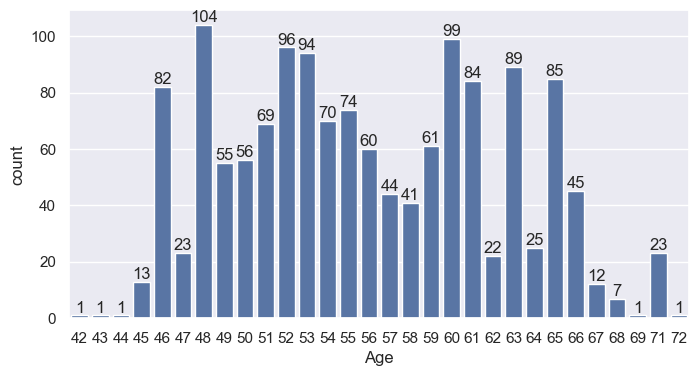

In [53]:
ax = sns.countplot(x = 'Age',data = df)

for bars in ax.containers:
    sns.set(rc={'figure.figsize':(4.5,3)})
    ax.bar_label(bars)

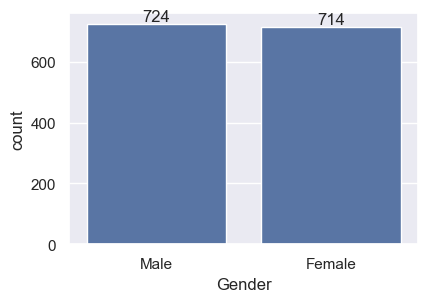

In [12]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    sns.set(rc={'figure.figsize':(4,3)})
    ax.bar_label(bars)

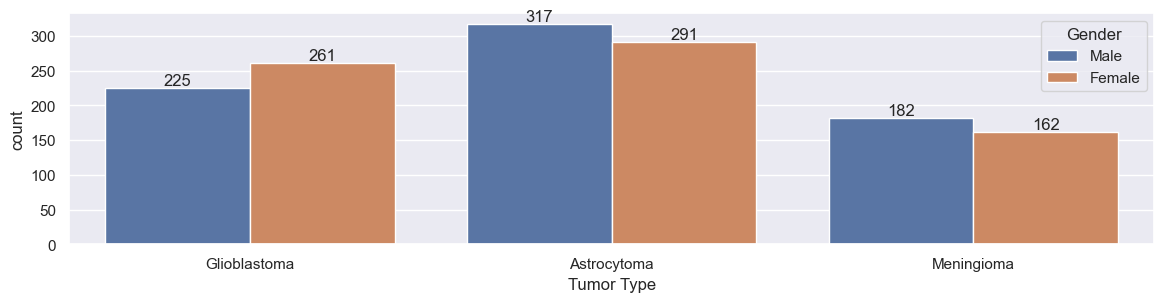

In [18]:
ax = sns.countplot(data = df, x = 'Tumor Type', hue = 'Gender')

for bars in ax.containers:
    sns.set(rc={'figure.figsize':(7,3)})
    ax.bar_label(bars)

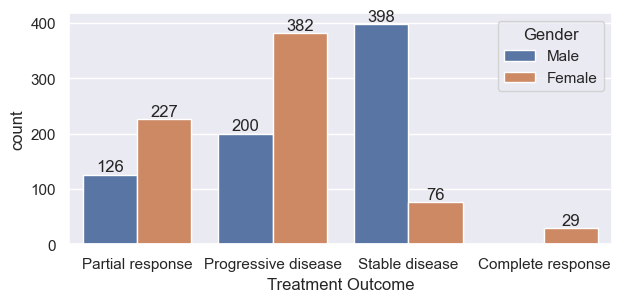

In [20]:
ax = sns.countplot(data = df, x = 'Treatment Outcome', hue = 'Gender')

for bars in ax.containers:
    sns.set(rc={'figure.figsize':(7,3)})
    ax.bar_label(bars)

<Axes: xlabel='Age', ylabel='Survival Time (months)'>

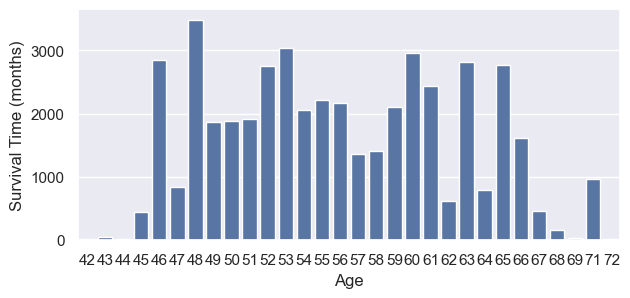

In [25]:
sales_age = df.groupby(['Age'], as_index=False)['Survival Time (months)'].sum().sort_values(by='Survival Time (months)', ascending=False)

sns.barplot(x = 'Age',y= 'Survival Time (months)' ,data = sales_age)

<Axes: xlabel='Recurrence Site', ylabel='Time to Recurrence (months)'>

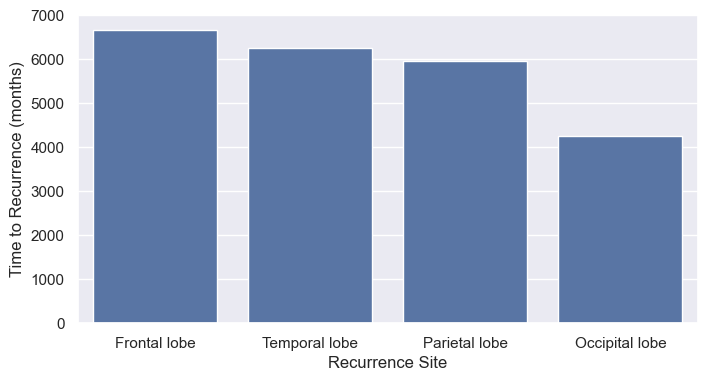

In [46]:
sales_state = df.groupby(['Recurrence Site'], as_index=False)['Time to Recurrence (months)'].sum().sort_values(by='Time to Recurrence (months)', ascending=False).head(10)

sns.set(rc={'figure.figsize':(8,4)})
sns.barplot(data = sales_state, x = 'Recurrence Site',y= 'Time to Recurrence (months)')